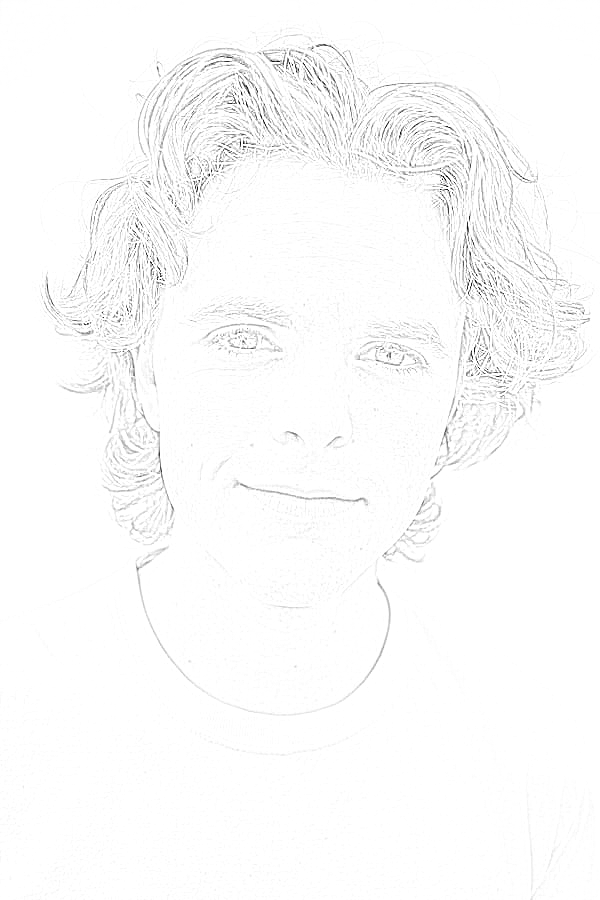

In [2]:
import cv2
import requests
import numpy as np
from PIL import Image
from io import BytesIO

def img2sketch(photo_url, k_size):
    # Send a GET request to download the image
    response = requests.get(photo_url)
    # Read the content of the response
    image_content = response.content
    # Create a PIL Image object from the image content
    img = Image.open(BytesIO(image_content))
    # Convert the PIL Image to a NumPy array
    img_np = np.array(img)
    # Convert the image to grayscale
    grey_img = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    # Invert the grayscale image
    invert_img = cv2.bitwise_not(grey_img)
    # Blur the inverted image
    blur_img = cv2.GaussianBlur(invert_img, (k_size, k_size), 0)
    # Invert the blurred image
    invblur_img = cv2.bitwise_not(blur_img)
    # Create the sketch image
    sketch_img = cv2.divide(grey_img, invblur_img, scale=256.0)
    # Save the sketch image
    cv2.imwrite('/content/sketch.png', sketch_img)
    # Display the sketch image
    from google.colab.patches import cv2_imshow
    cv2_imshow(sketch_img)

# Function call
img2sketch(photo_url='https://images.unsplash.com/photo-1552374196-c4e7ffc6e126?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8OHx8cG9ydHJhaXR8ZW58MHx8MHx8fDA%3D&auto=format&fit=crop&w=600&q=60', k_size=7)


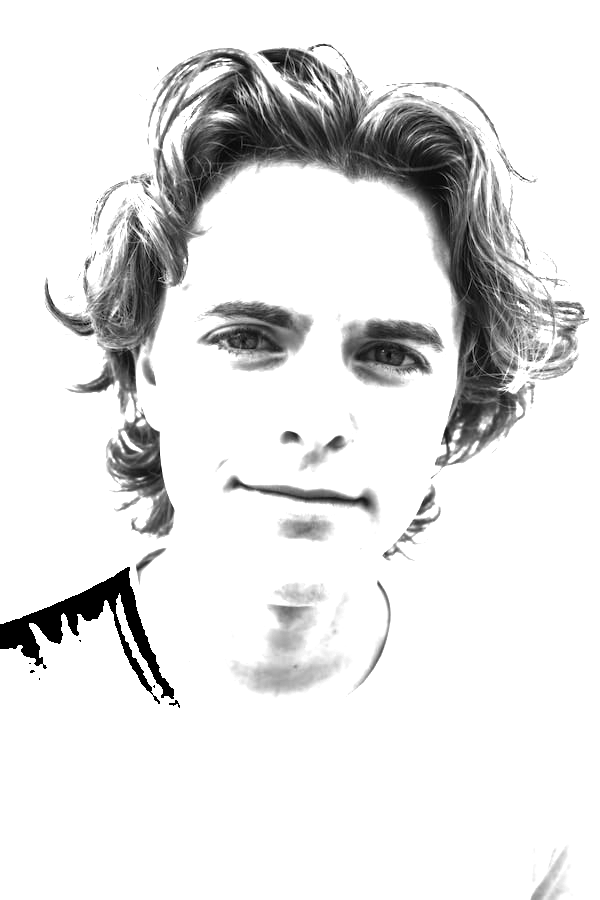

In [7]:
import cv2
import requests
import numpy as np
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow

def img2sketch(photo_url, k_size):
    # Send a GET request to download the image
    response = requests.get(photo_url)
    # Read the content of the response
    image_content = response.content
    # Create a PIL Image object from the image content
    img = Image.open(BytesIO(image_content))
    # Convert the PIL Image to a NumPy array
    img_np = np.array(img)
    # Convert the image to grayscale
    grey_img = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    # Invert the grayscale image
    invert_img = cv2.bitwise_not(grey_img)
    # Blur the inverted image
    blur_img = cv2.GaussianBlur(invert_img, (k_size, k_size), 0)
    # Invert the blurred image
    invblur_img = cv2.bitwise_not(blur_img)
    # Adjust the contrast of the inverted blurred image
    adjusted_img = cv2.multiply(invblur_img, 1.2)
    # Invert the adjusted image
    invadjusted_img = cv2.bitwise_not(adjusted_img)
    # Create the sketch image
    sketch_img = cv2.divide(grey_img, invadjusted_img, scale=256.0)
    # Save the sketch image
    cv2.imwrite('/content/sketch.png', sketch_img)
    # Display the sketch image
    cv2_imshow(sketch_img)

# Function call
img2sketch(photo_url='https://images.unsplash.com/photo-1552374196-c4e7ffc6e126?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8OHx8cG9ydHJhaXR8ZW58MHx8MHx8fDA%3D&auto=format&fit=crop&w=600&q=60', k_size=7)
